# Table of Contents
- [1 Univariate Analysis](#1-Univariate-Analysis)
  - [1_1 Feature engineering](#1_1-Feature-engineering)
---
    
- [2 Bivariate Analysis](#2-Bivariate-Analysis)
  - [2_1 Feature engineering](#2_1-Feature-engineering)
---
- [3 Multivariate Analysis](#3-Multivariate-Analysis)
  - [3_1 Feature engineering](#3_1-Feature-engineering)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [3]:
# !python generate_data.py

In [4]:
df = pd.read_csv('your_data.csv')
df

,Unnamed: 0,fasting blood sugar,triglyceride,ALT,waist(cm),serum creatinine,systolic,weight(kg),AST,dental caries,Cholesterol,smoking
0,0,94,300,25,81.0,1.0,135,60,22,0,172,1
1,1,147,55,23,89.0,1.1,146,65,27,1,194,0
2,2,79,197,31,81.0,0.8,118,75,27,0,178,1
3,3,91,203,27,105.0,1.0,131,95,20,1,180,0
4,4,91,87,13,80.5,0.8,121,60,19,0,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,64,47,26,69.0,0.8,127,45,25,0,238,0
159252,159252,89,202,20,82.0,0.6,120,75,21,0,213,0
159253,159253,84,45,9,66.0,0.6,114,50,15,0,189,0
159254,159254,122,148,17,92.0,1.1,121,75,22,0,165,1


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fasting blood sugar  159256 non-null  int64  
 1   triglyceride         159256 non-null  int64  
 2   ALT                  159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   serum creatinine     159256 non-null  float64
 5   systolic             159256 non-null  int64  
 6   weight(kg)           159256 non-null  int64  
 7   AST                  159256 non-null  int64  
 8   dental caries        159256 non-null  int64  
 9   Cholesterol          159256 non-null  int64  
 10  smoking              159256 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 13.4 MB


In [6]:
X = df.drop(['smoking'], axis=1)
Y = df['smoking']

# 1 Univariate Analysis

In [8]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

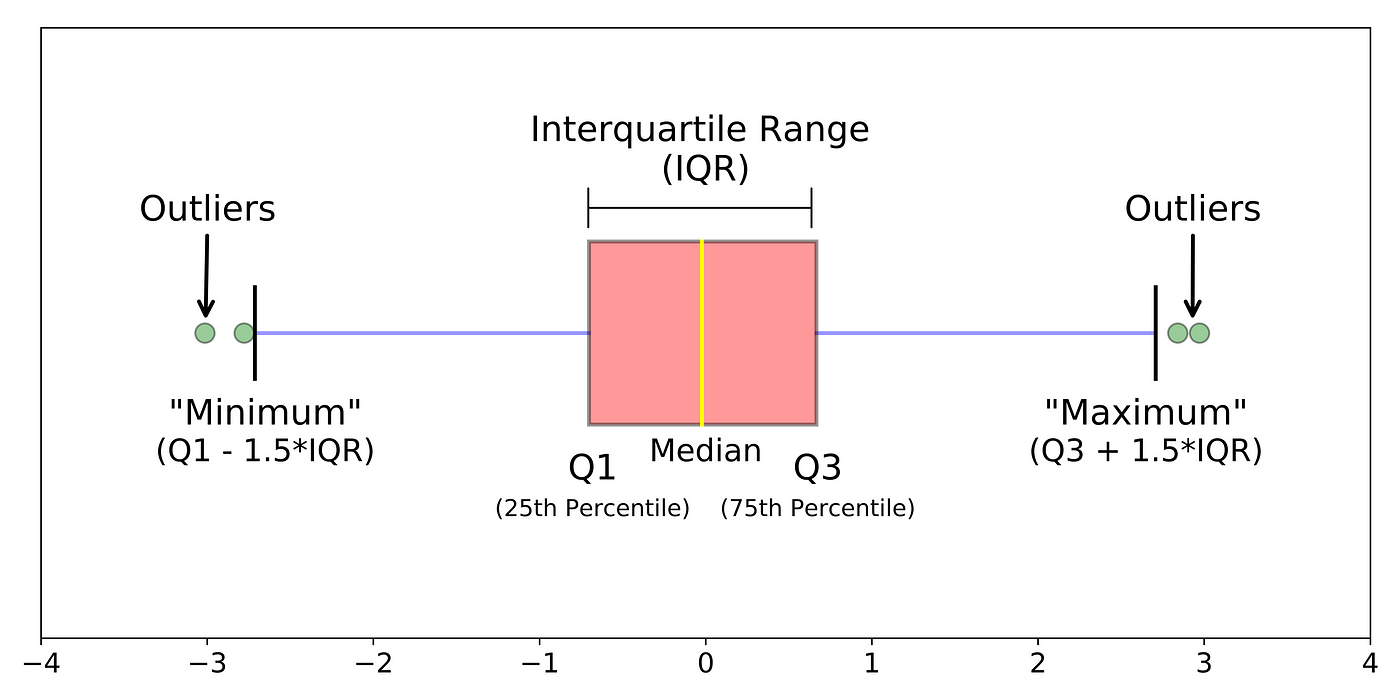

- ### Median (Q2)

Indicates the central tendency of the data.

Example: If the median is closer to Q1, the data is right-skewed.

- ### Box (IQR)

A wider box = more spread in the middle 50% of data.

A narrow box = data points are tightly clustered.

- ### Whiskers

Show the range of "typical" values.

Longer whiskers = more variability in the tails.

- ### Outliers

Values significantly higher/lower than the rest (e.g., age > 100 in a human dataset).

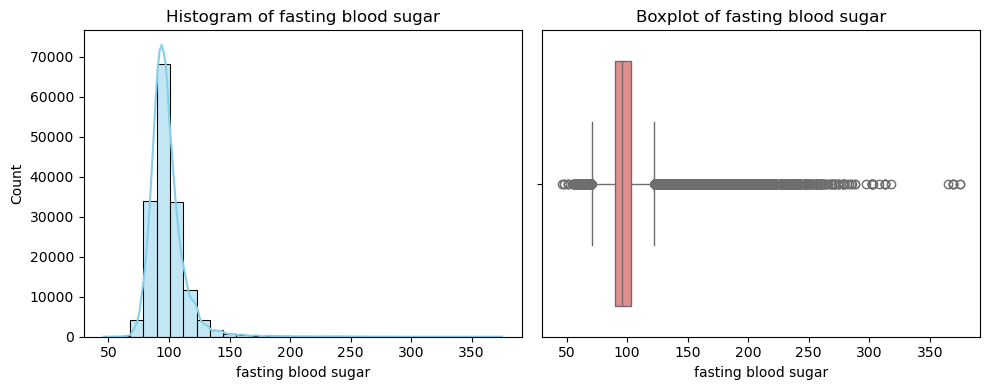

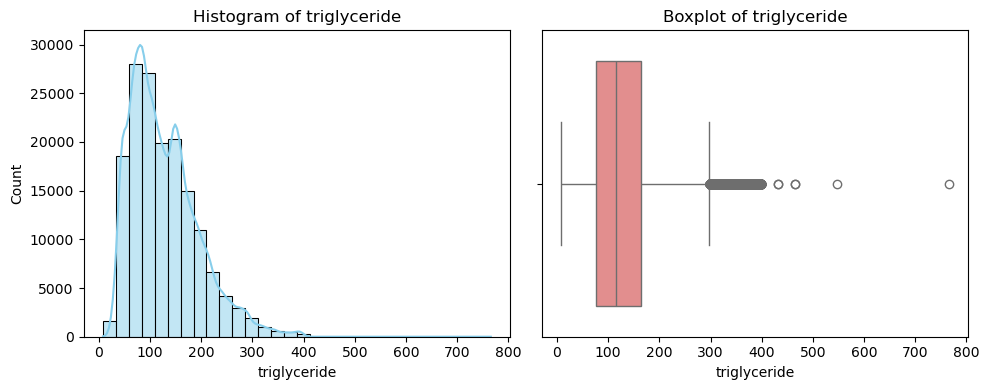

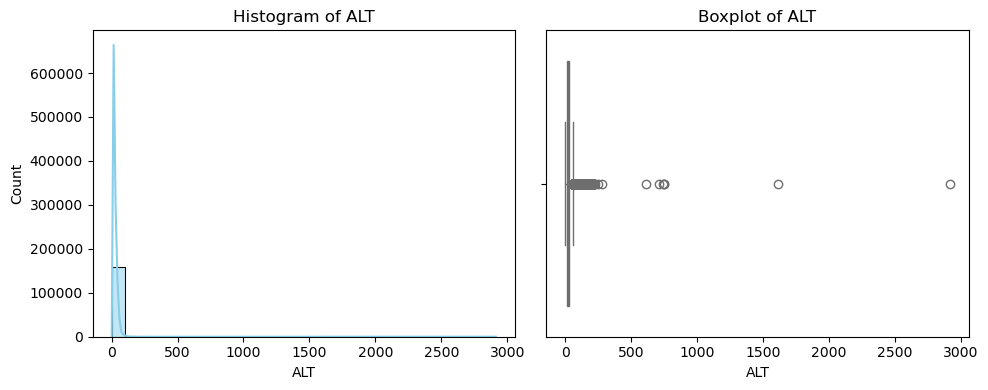

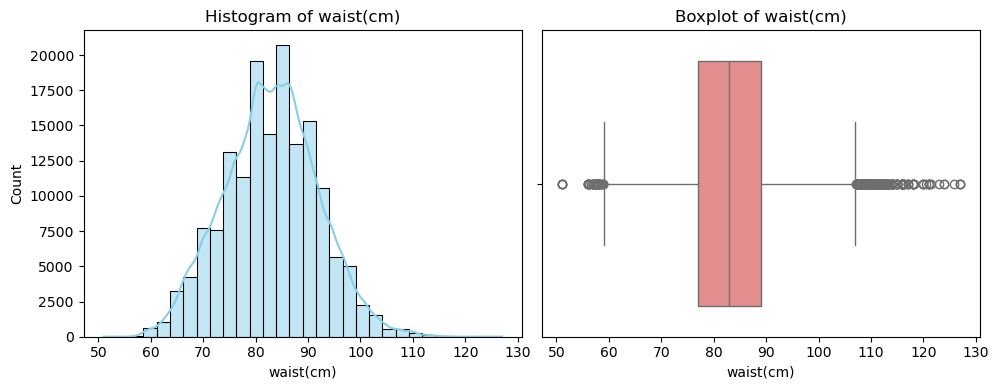

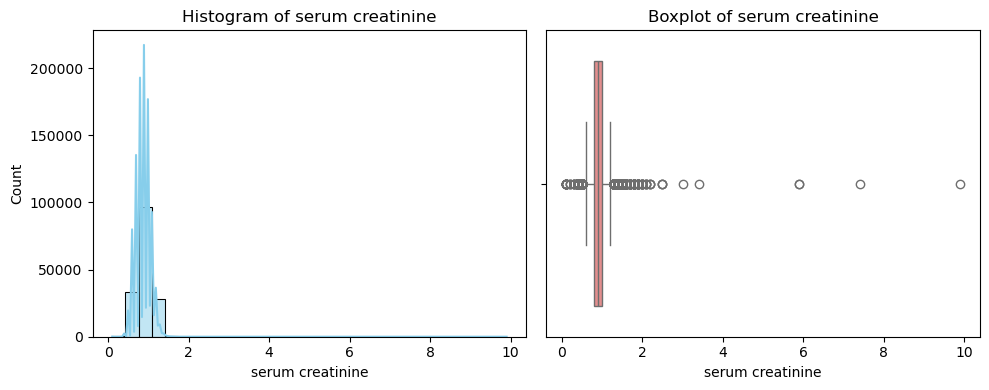

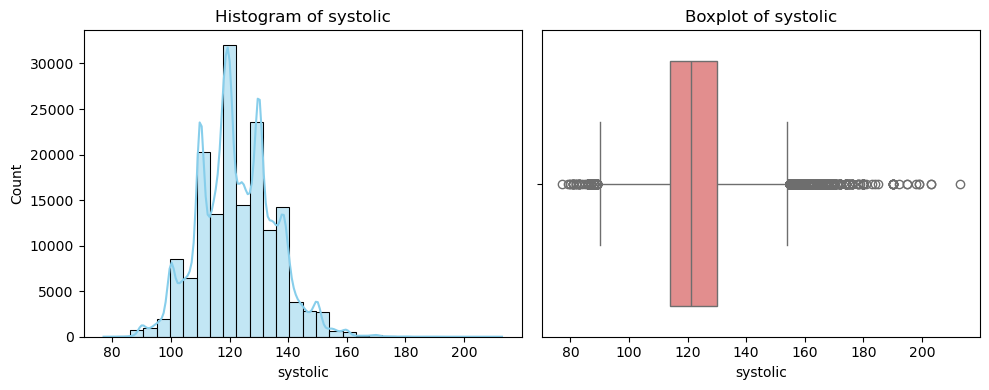

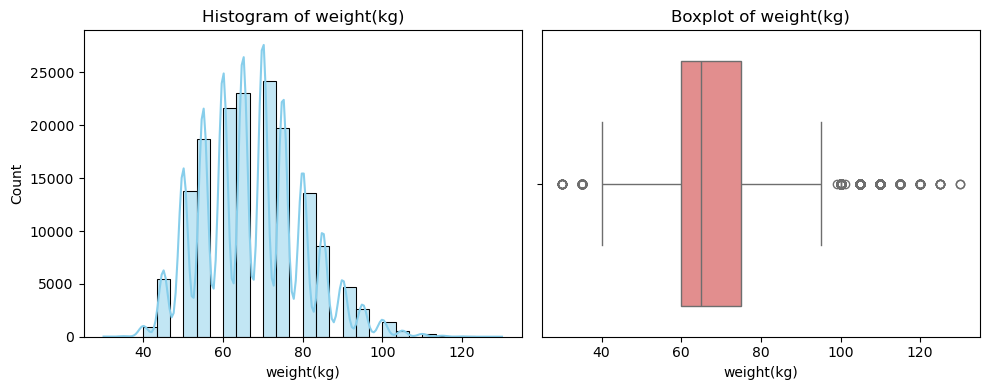

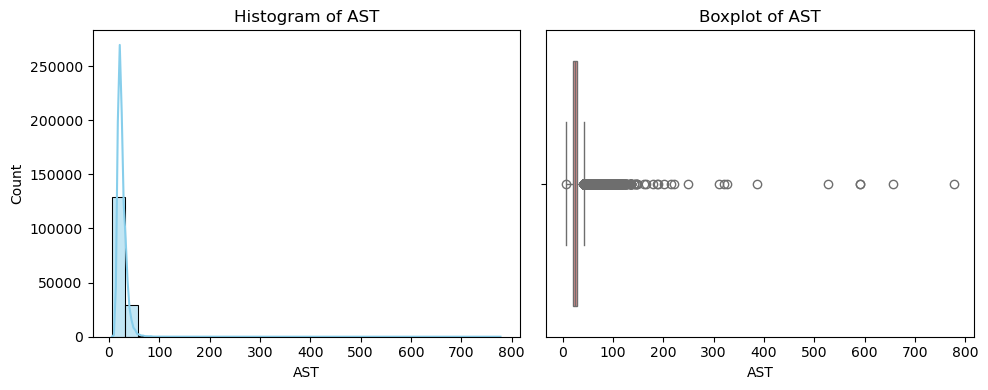

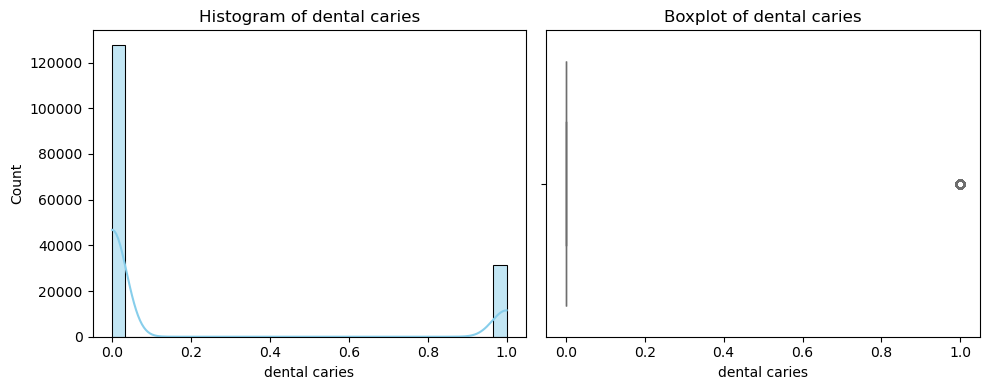

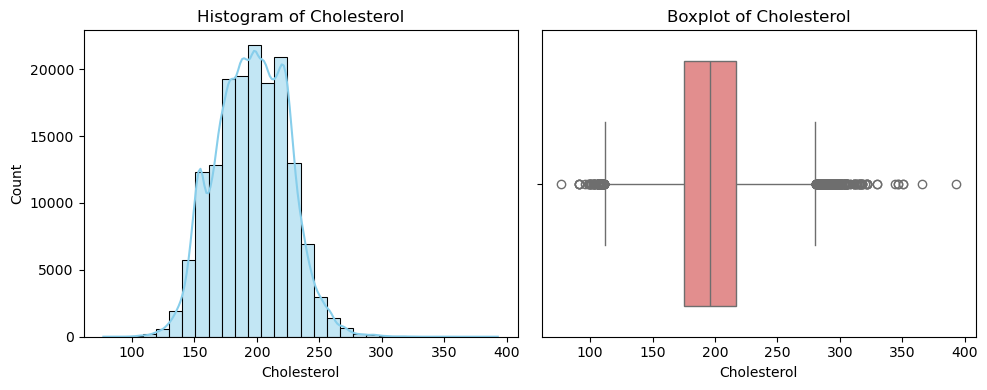

In [10]:
target = 'smoking'
for col in numeric_features:
    if col != target:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, bins=30, color='skyblue')
        plt.title(f"Histogram of {col}")
    
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='lightcoral')
        plt.title(f"Boxplot of {col}")
    
        plt.tight_layout()
        plt.show()


In [11]:
lower_fence = {}
higher_fence = {}

for col in numeric_features:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_fence[col] = (df[col].quantile(0.25) - (1.5 * IQR))
    higher_fence[col] = (df[col].quantile(0.75) + (1.5 * IQR))
    print(f"{col} boundaries are [{lower_fence[col]} - {higher_fence[col]}]")

fasting blood sugar boundaries are [70.5 - 122.5]
triglyceride boundaries are [-55.0 - 297.0]
ALT boundaries are [-8.0 - 56.0]
waist(cm) boundaries are [59.0 - 107.0]
serum creatinine boundaries are [0.5000000000000001 - 1.2999999999999998]
systolic boundaries are [90.0 - 154.0]
weight(kg) boundaries are [37.5 - 97.5]
AST boundaries are [6.5 - 42.5]
dental caries boundaries are [0.0 - 0.0]
Cholesterol boundaries are [112.0 - 280.0]
smoking boundaries are [-1.5 - 2.5]


In [12]:
for var in numeric_features:
    print(df[var].value_counts())

fasting blood sugar
94     7109
97     6733
92     6615
95     6585
91     6461
       ... 
219       1
62        1
251       1
46        1
176       1
Name: count, Length: 229, dtype: int64
triglyceride
82     1555
147    1548
85     1505
71     1476
79     1404
       ... 
466       2
18        1
766       1
548       1
15        1
Name: count, Length: 392, dtype: int64
ALT
15     7337
16     7226
18     6890
17     6805
19     6757
       ... 
178       1
161       1
176       1
216       1
134       1
Name: count, Length: 188, dtype: int64
waist(cm)
80.0     6572
86.0     6026
84.0     5986
82.0     5962
81.0     5619
         ... 
107.7       1
106.2       1
57.5        1
63.6        1
56.3        1
Name: count, Length: 531, dtype: int64
serum creatinine
0.9    35776
1.0    31313
0.8    29802
0.7    19782
1.1    17830
0.6    11153
1.2     7657
0.5     2624
1.3     2123
1.4      604
0.4      311
1.5      137
1.6       58
0.1       17
1.8       15
1.9       12
1.7       11
2.0      

In [13]:
print(df.describe())

       fasting blood sugar   triglyceride            ALT      waist(cm)  \
count        159256.000000  159256.000000  159256.000000  159256.000000   
mean             98.352552     127.616046      26.550296      83.001990   
std              15.329740      66.188989      17.753070       8.957937   
min              46.000000       8.000000       1.000000      51.000000   
25%              90.000000      77.000000      16.000000      77.000000   
50%              96.000000     115.000000      22.000000      83.000000   
75%             103.000000     165.000000      32.000000      89.000000   
max             375.000000     766.000000    2914.000000     127.000000   

       serum creatinine       systolic     weight(kg)            AST  \
count     159256.000000  159256.000000  159256.000000  159256.000000   
mean           0.892764     122.503648      67.143662      25.516853   
std            0.179346      12.729315      12.586198       9.464882   
min            0.100000      77.0000

## 1_1 Feature engineering

In [15]:
df_uni = df
special_col = 'dental caries'

In [16]:
def max_value(df_uni, col, top):
    return np.where(df_uni[col]>top, top, df_uni[col])
    
def min_value(df_, col, bottom):
    return np.where(df_uni[col]<bottom, bottom, df_uni[col])

In [17]:
for col in numeric_features:
    if col != special_col:
        df_uni[col] = max_value(df_uni, col, higher_fence[col])
        df_uni[col] = min_value(df_uni, col, lower_fence[col])

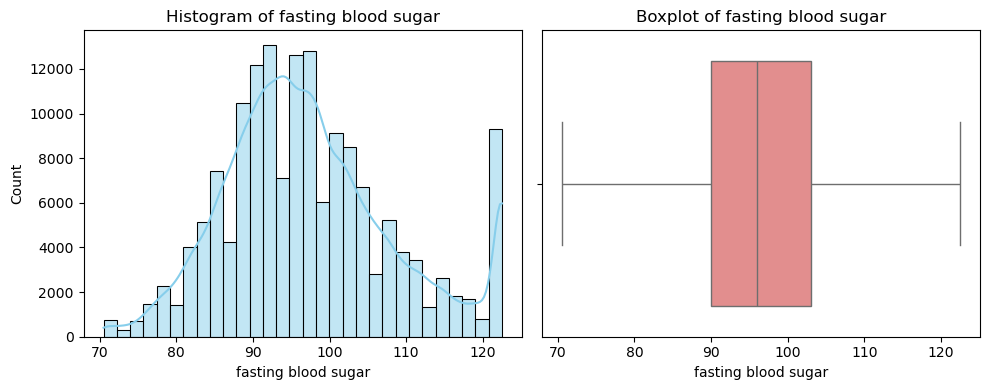

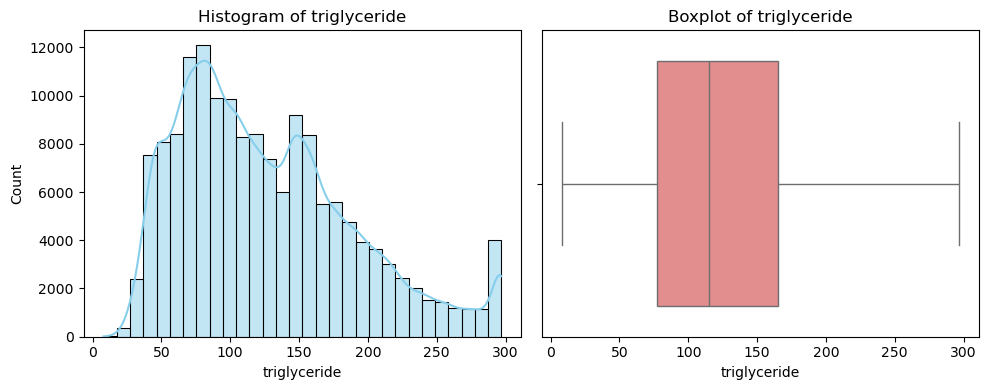

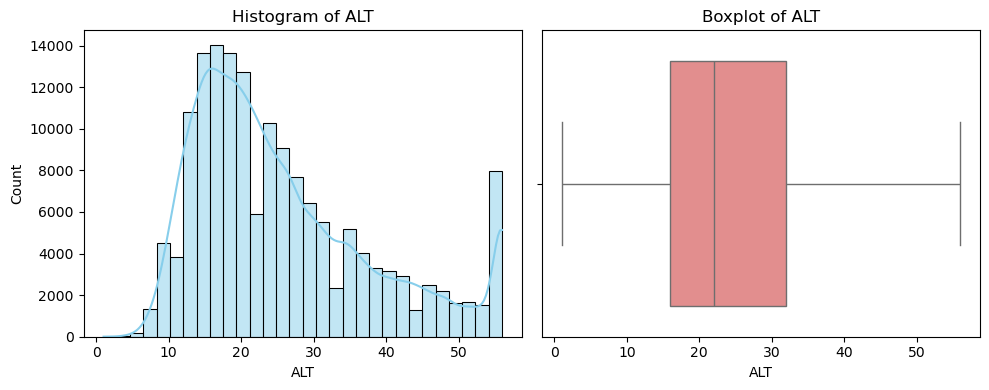

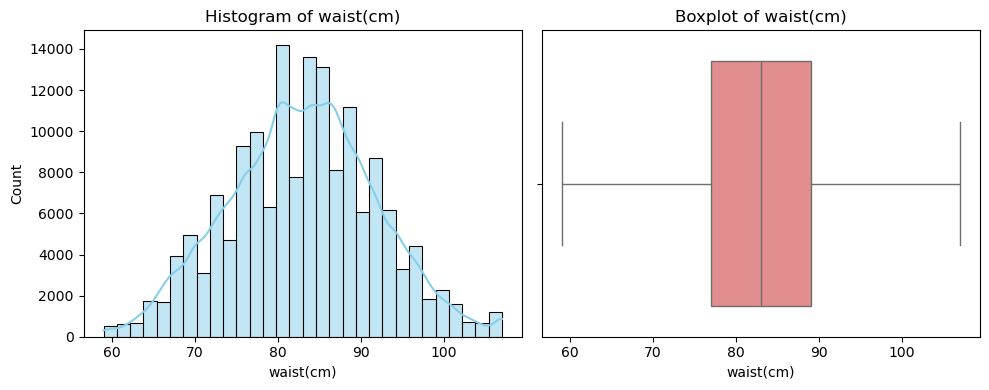

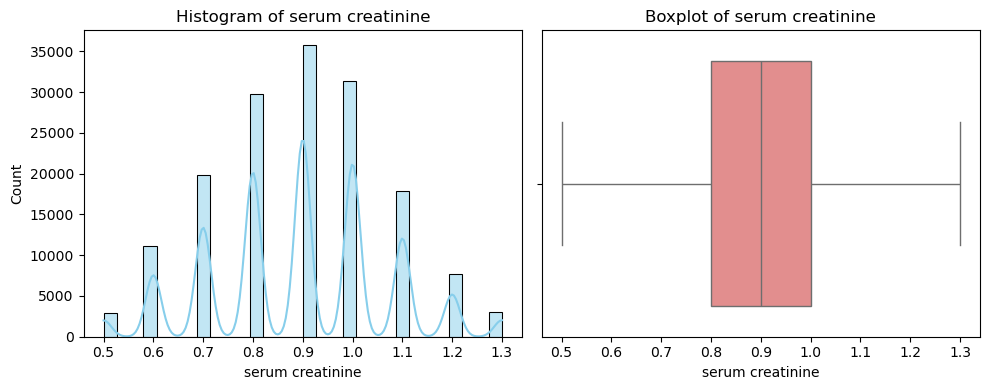

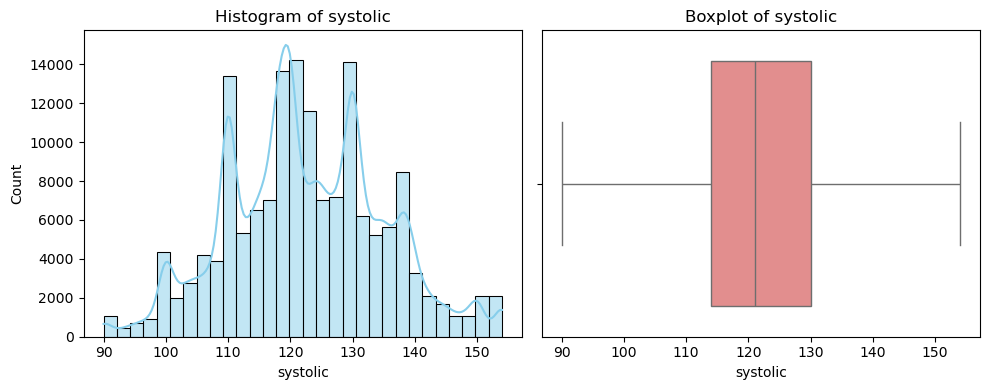

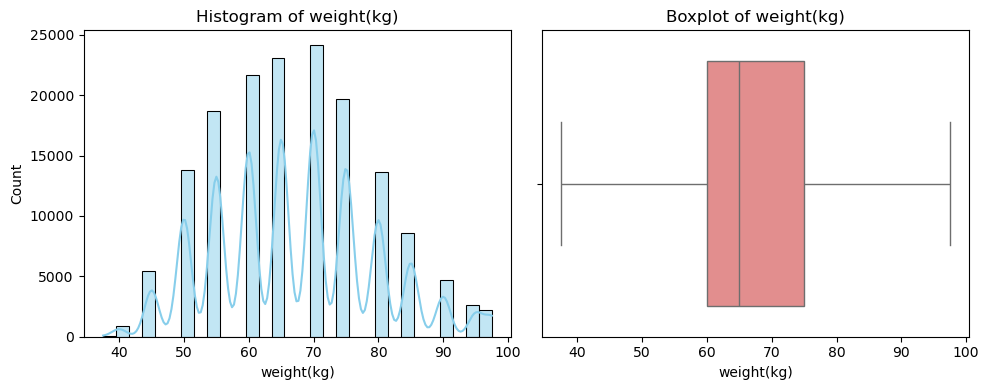

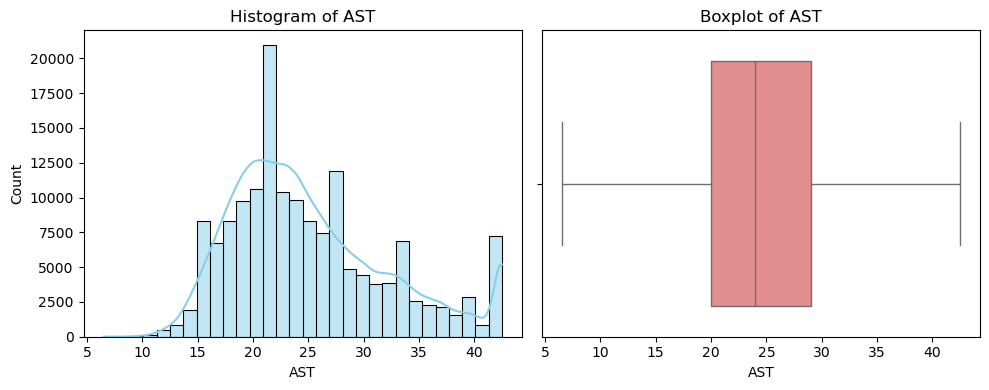

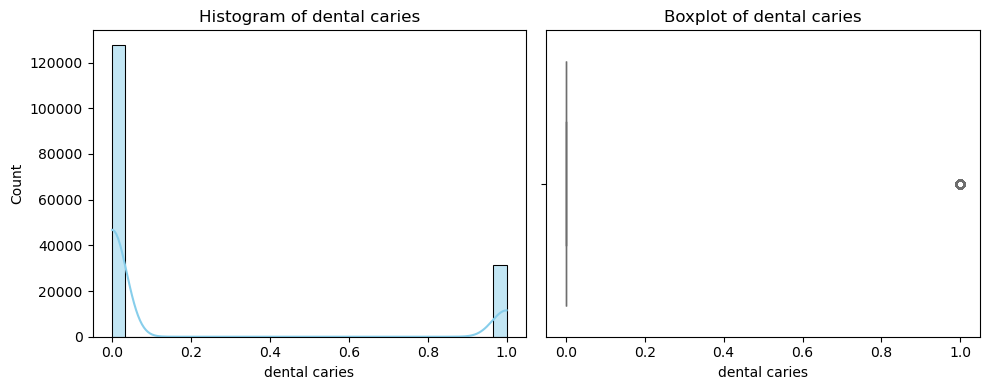

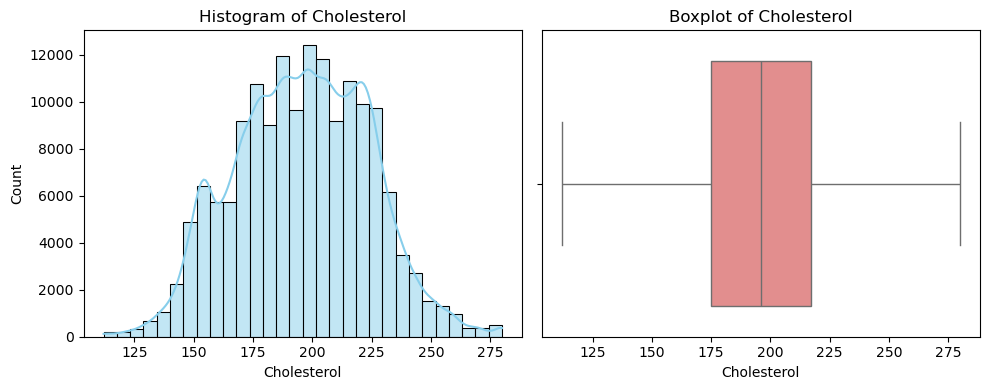

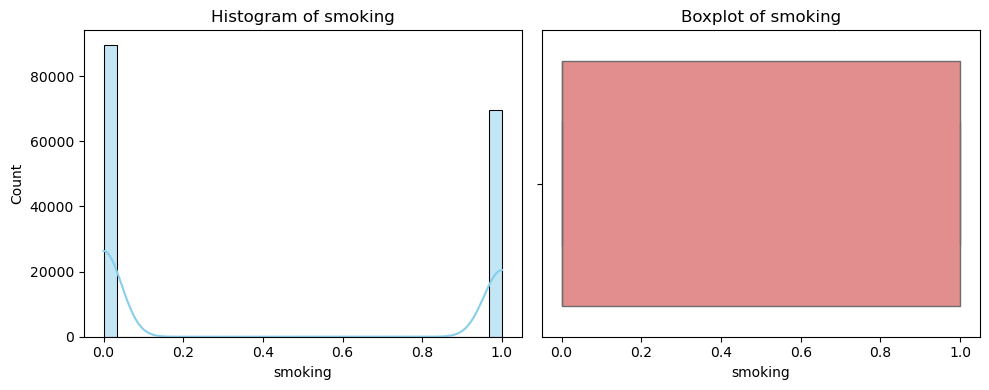

In [18]:
for col in numeric_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_uni[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_uni[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


In [19]:
non_df = df_uni[df_uni['smoking'] == 0]
smoking_df = df_uni[df_uni['smoking'] == 1]
non_df = non_df.sample(n=len(smoking_df), random_state=42)
df_uni = pd.concat([non_df, smoking_df])

In [20]:
print(df_uni['smoking'].value_counts())

smoking
0.0    69653
1.0    69653
Name: count, dtype: int64


# 2 Bivariate Analysis

### Example Insights
- Higher Median Dependency in Failed Quitters (successfully_quit = False)
- The median nicotine_dependency is visibly higher for those who failed to quit compared to those who succeeded.

- Interpretation: Stronger nicotine addiction correlates with lower quitting success.

### Wider IQR in Failed Quitters

- The box (IQR) for False is wider, indicating more variability in dependency levels among those who failed.

- Interpretation: Even some low-dependency smokers failed, but high-dependency smokers consistently struggled.

### Outliers in Successful Quitters (successfully_quit = True)

- A few dots (outliers) appear above the upper whisker for the True group.

- Interpretation: A small subset quit despite high dependency—worth investigating (e.g., did they use specific therapies?).

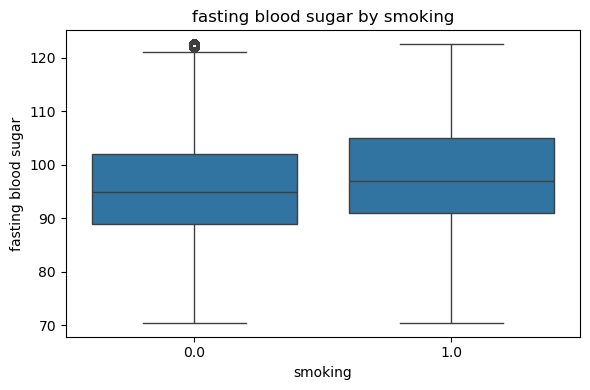

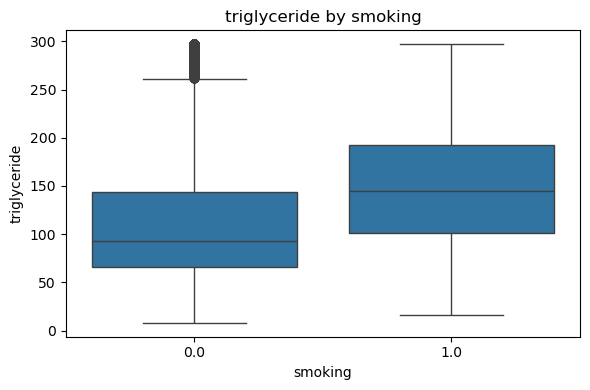

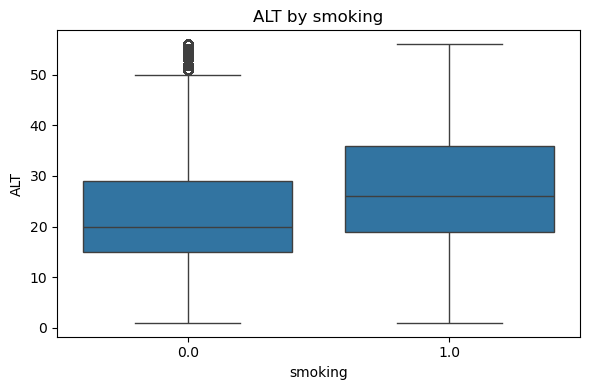

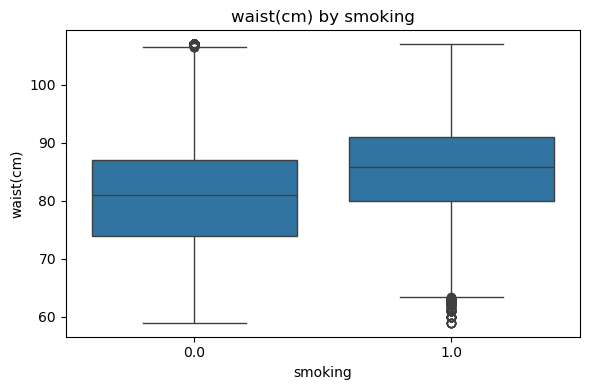

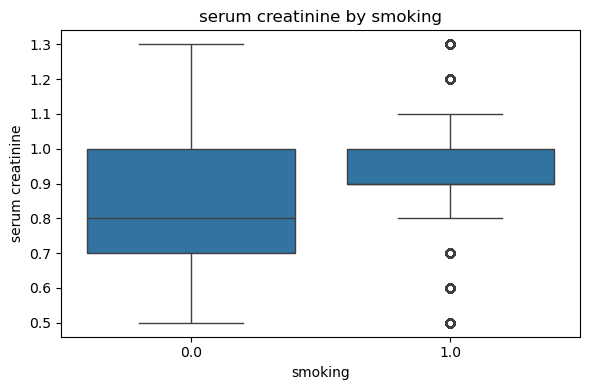

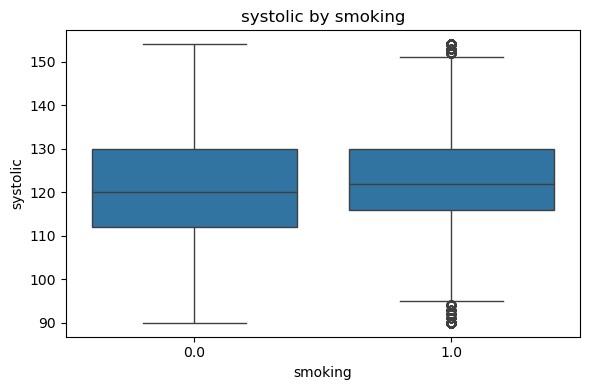

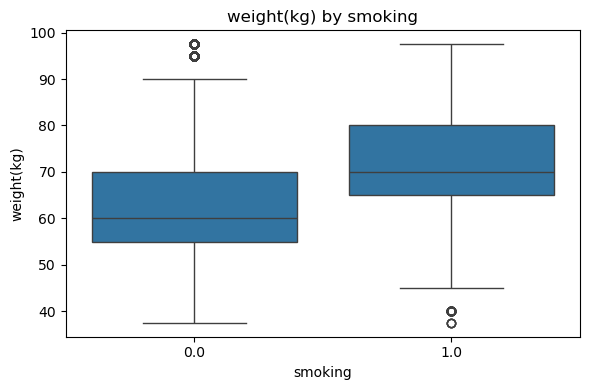

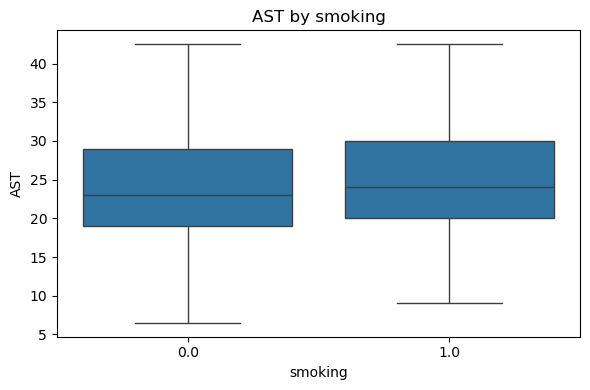

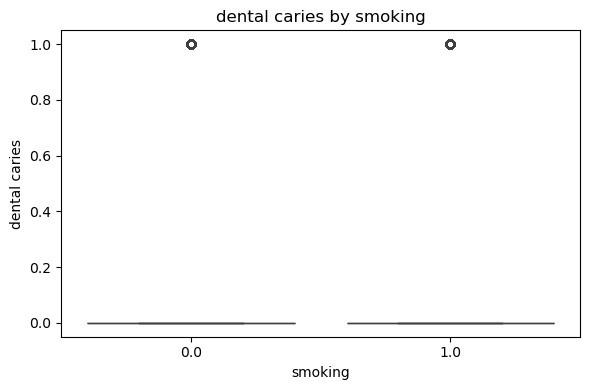

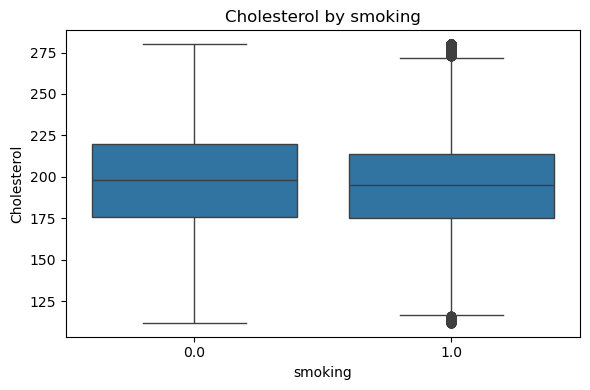

In [23]:
target = 'smoking'

for col in numeric_features:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} by {target}")
        plt.tight_layout()
        plt.show()

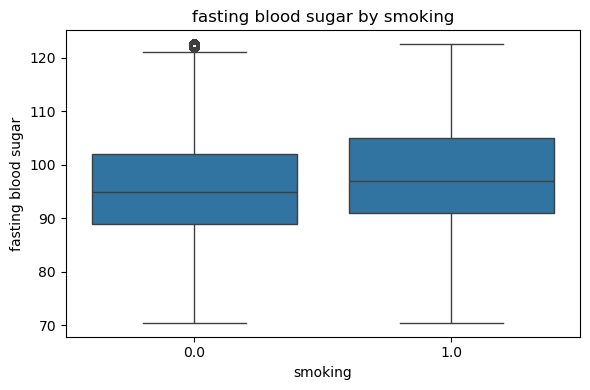

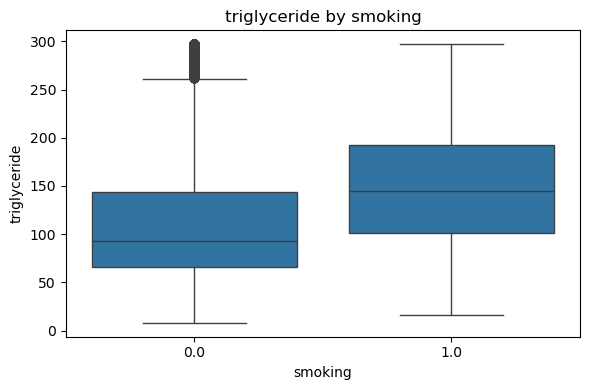

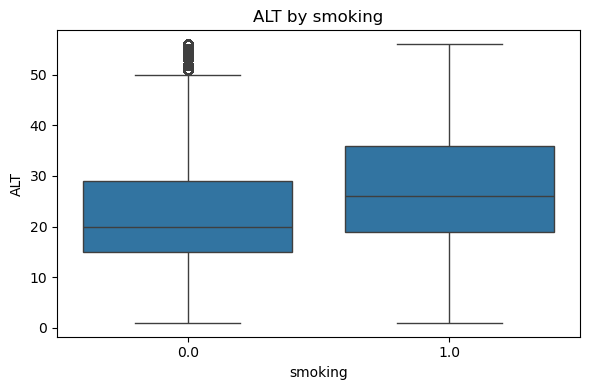

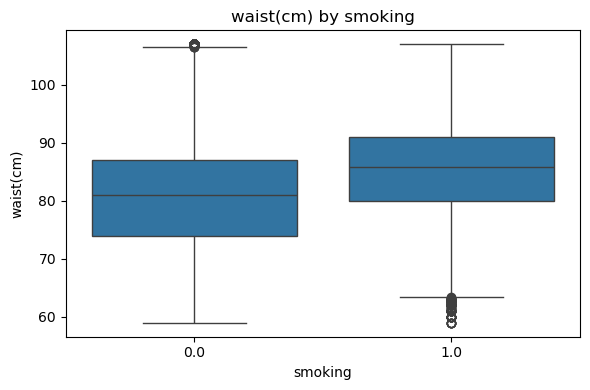

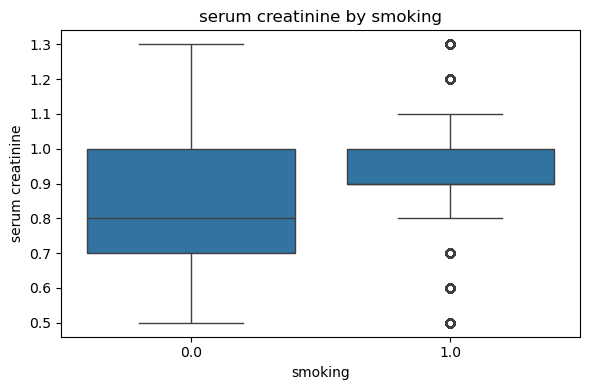

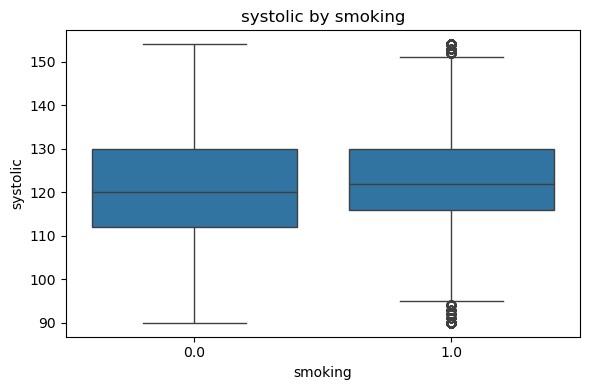

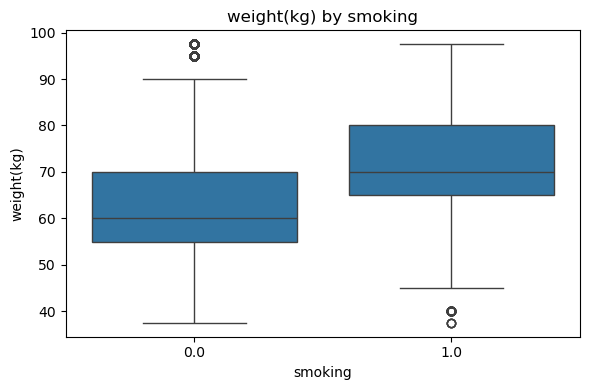

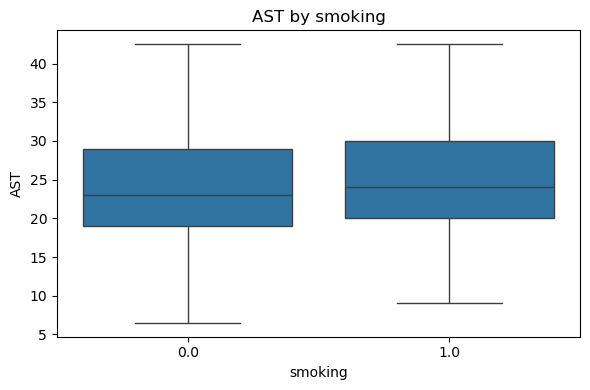

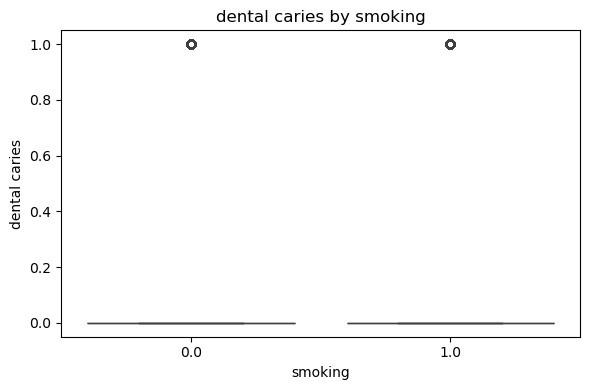

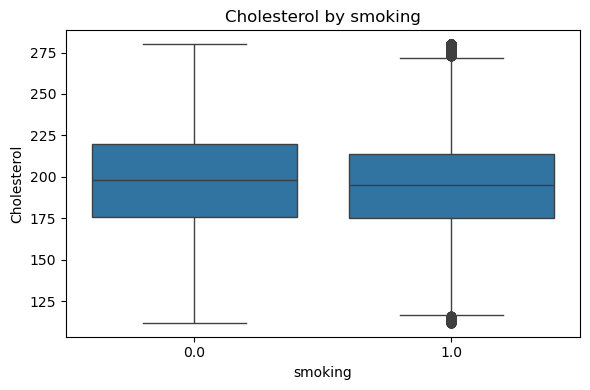

In [24]:
target = 'smoking'

for col in numeric_features:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=df_uni)
        plt.title(f"{col} by {target}")
        plt.tight_layout()
        plt.show()

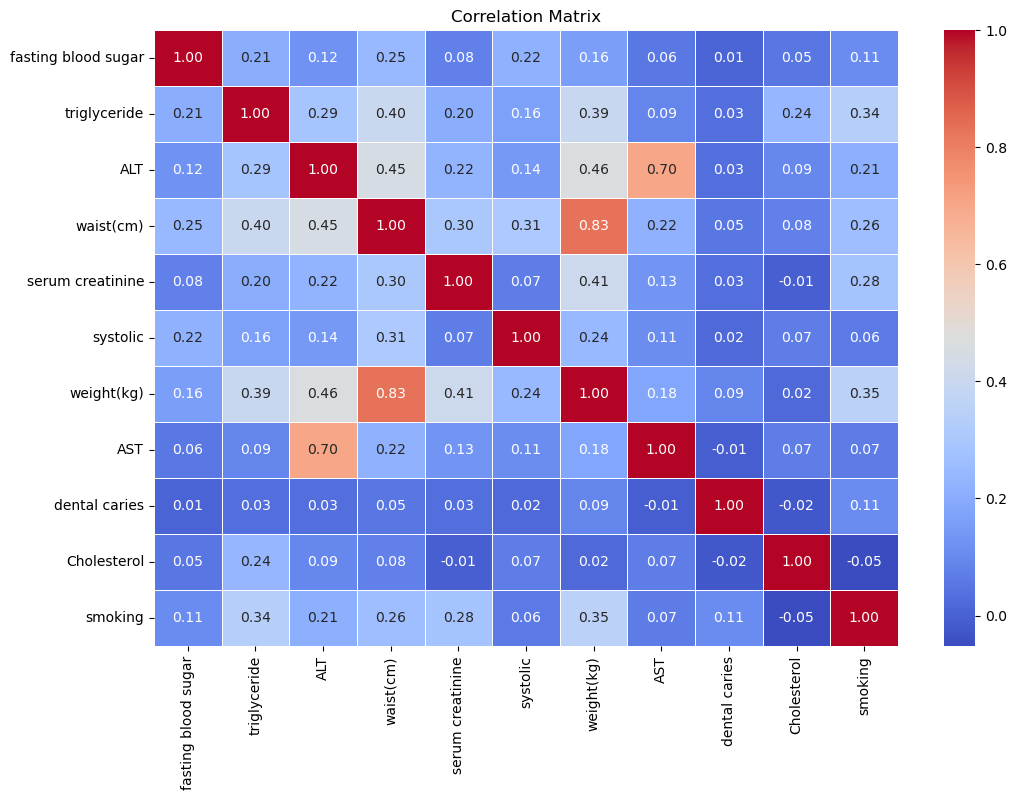

In [25]:
plt.figure(figsize=(12, 8))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

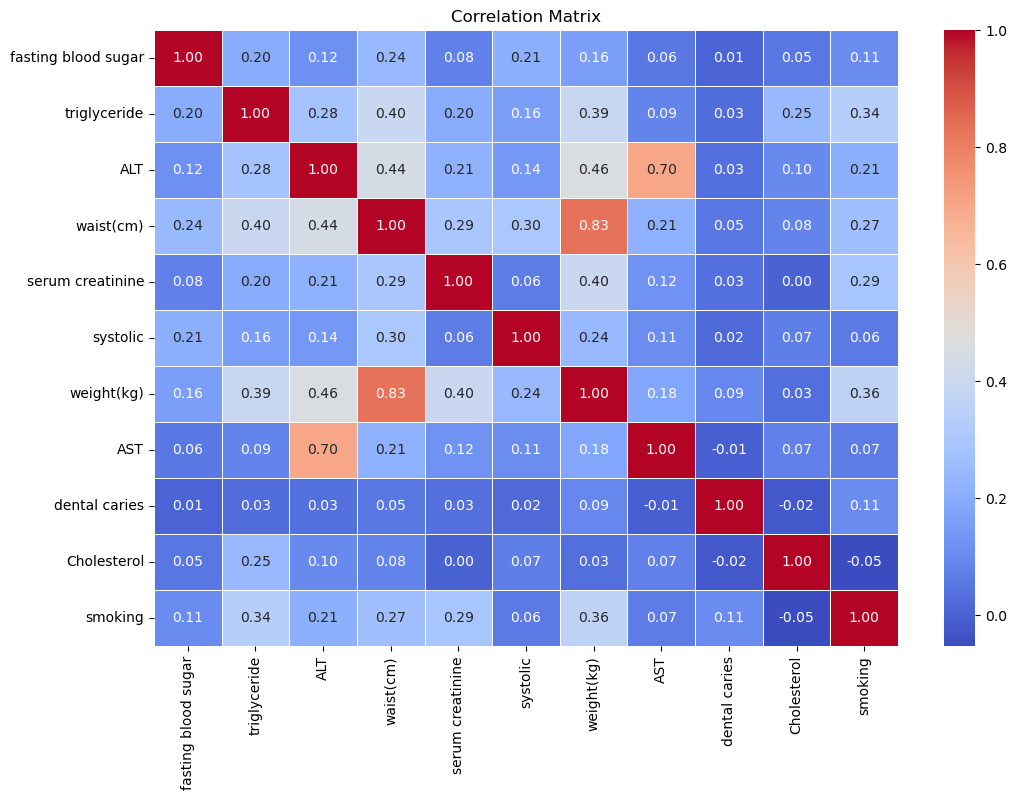

In [26]:
plt.figure(figsize=(12, 8))
corr = df_uni[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## 2_1 Feature engineering

In [28]:
Y = df_uni['smoking']

contingency = pd.crosstab(df_uni['dental caries'], Y)

print("Contingency table:")
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("Significant relationship between dental_caries and target (p < 0.05)")
else:
    print("No significant relationship (p >= 0.05)")


Contingency table:
smoking          0.0    1.0
dental caries              
0              58472  52505
1              11181  17148
Chi-squared statistic: 1577.1467
p-value: 0.0000
Significant relationship between dental_caries and target (p < 0.05)


In [29]:
low_corr = ['systolic', 'Cholesterol']
for col in low_corr:
    group1 = df_uni[Y == 1][col]
    group0 = df_uni[Y == 0][col]
    
    t_stat, p = ttest_ind(group1, group0)
    
    if p < 0.05:
        print(f"{col}: Significant difference in mean cholesterol between groups")
    else:
        print(f"{col}: No significant difference in mean cholesterol between groups")


systolic: Significant difference in mean cholesterol between groups
Cholesterol: Significant difference in mean cholesterol between groups


# 3 Multivariate Analysis

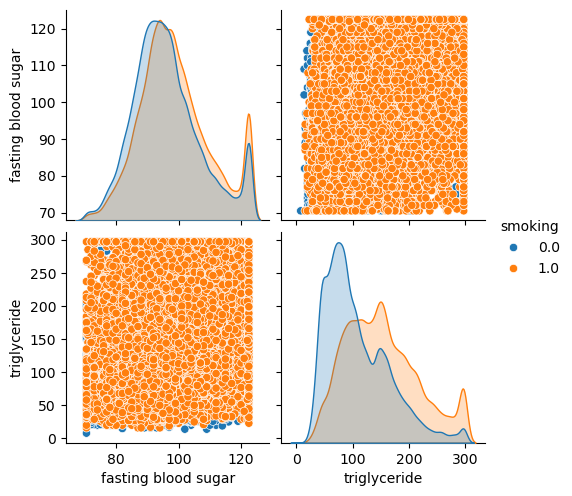

In [31]:
selected_features = numeric_features[:2]  # Use a subset to avoid clutter
sns.pairplot(df_uni[selected_features + [target]], hue=target)
plt.show()

## 3_1 Feature engineering

In [33]:
df_uni

,fasting blood sugar,triglyceride,ALT,waist(cm),serum creatinine,systolic,weight(kg),AST,dental caries,Cholesterol,smoking
30390,92.0,147.0,28.0,89.0,0.7,130.0,80.0,23.0,0,168.0,0.0
93813,98.0,78.0,41.0,92.0,0.9,110.0,80.0,29.0,0,230.0,0.0
64029,91.0,109.0,46.0,91.0,0.9,125.0,75.0,32.0,0,171.0,0.0
82314,78.0,86.0,15.0,83.5,0.9,117.0,70.0,24.0,0,223.0,0.0
61633,108.0,98.0,54.0,77.0,0.7,132.0,65.0,40.0,0,181.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
159242,96.0,79.0,17.0,83.0,1.0,134.0,70.0,21.0,0,151.0,1.0
159244,84.0,181.0,24.0,99.0,1.0,137.0,85.0,33.0,0,163.0,1.0
159245,105.0,297.0,41.0,87.2,1.0,110.0,80.0,23.0,1,255.0,1.0
159249,91.0,248.0,44.0,91.4,0.9,110.0,85.0,26.0,0,220.0,1.0


In [34]:
df_uni['AST_ALT_ratio'] = df_uni['AST'] / (df_uni['ALT'] + 1e-5)  # avoid division by zero

In [35]:
df_uni['waist_weight_ratio'] = df_uni['waist(cm)'] / df_uni['weight(kg)']

In [36]:
removed = ['AST', 'ALT', 'waist(cm)', 'weight(kg)']
df_uni.drop(columns = removed, inplace=True)
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139306 entries, 30390 to 159254
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fasting blood sugar  139306 non-null  float64
 1   triglyceride         139306 non-null  float64
 2   serum creatinine     139306 non-null  float64
 3   systolic             139306 non-null  float64
 4   dental caries        139306 non-null  int64  
 5   Cholesterol          139306 non-null  float64
 6   smoking              139306 non-null  float64
 7   AST_ALT_ratio        139306 non-null  float64
 8   waist_weight_ratio   139306 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 10.6 MB


In [40]:
lower_fence = {}
higher_fence = {}
new_features = ['AST_ALT_ratio', 'waist_weight_ratio']

for col in new_features:
    IQR = df_uni[col].quantile(0.75) - df_uni[col].quantile(0.25)
    lower_fence[col] = (df_uni[col].quantile(0.25) - (1.5 * IQR))
    higher_fence[col] = (df_uni[col].quantile(0.75) + (1.5 * IQR))
    print(f"{col} boundaries are [{lower_fence[col]} - {higher_fence[col]}]")

AST_ALT_ratio boundaries are [0.026316161587856546 - 2.089472352909365]
waist_weight_ratio boundaries are [0.854166666666667 - 1.6341666666666663]


In [42]:
for col in new_features:
    df_uni[col] = max_value(df_uni, col, higher_fence[col])
    df_uni[col] = min_value(df_uni, col, lower_fence[col])

In [44]:
target = df_uni.pop('smoking')
df_uni['smoking'] = target
df_sorted = df_uni.sort_index()  
df_sorted

,fasting blood sugar,triglyceride,serum creatinine,systolic,dental caries,Cholesterol,AST_ALT_ratio,waist_weight_ratio,smoking
0,94.0,297.0,1.0,135.0,0,172.0,0.880000,1.350000,1.0
1,122.5,55.0,1.1,146.0,1,194.0,1.173913,1.369231,0.0
2,79.0,197.0,0.8,118.0,0,178.0,0.870967,1.080000,1.0
3,91.0,203.0,1.0,131.0,1,180.0,0.740740,1.105263,0.0
4,91.0,87.0,0.8,121.0,0,155.0,1.461537,1.341667,1.0
...,...,...,...,...,...,...,...,...,...
159249,91.0,248.0,0.9,110.0,0,220.0,0.590909,1.075294,1.0
159251,70.5,47.0,0.8,127.0,0,238.0,0.961538,1.533333,0.0
159253,84.0,45.0,0.6,114.0,0,189.0,1.666665,1.320000,0.0
159254,122.0,148.0,1.1,121.0,0,165.0,1.294117,1.226667,1.0


In [46]:
df_sorted.to_csv('modified_data.csv')